In [4]:
import nltk
from nltk.corpus import reuters
from nltk.corpus import wordnet
 
reuters_words = [w.lower() for w in reuters.words()]
words = set(reuters_words)
counts = [(w, reuters_words.count(w)) for w in words]

fivek_array=[(w, c) for (w, c) in counts if c > 1000]

In [5]:
# Unique words in the corpus
print(len(words))

31078


In [47]:
# Number of words with 5k occurences
print(len(fivek_array))

104


In [48]:
print(fivek_array)

[('9', 2864), ('been', 2070), ('share', 3160), ('one', 2963), ('in', 29253), ('6', 3376), ('be', 6357), ('they', 2595), ('8', 3218), ('000', 10277), ('inc', 4121), ('pct', 9810), ('s', 15680), ('mln', 18623), ('its', 7402), ('bank', 3654), ('a', 25103), ('this', 3516), ('will', 5952), ('and', 25648), ('with', 6179), ('that', 7540), ('u', 6392), ('also', 2532), ('it', 11104), ('1986', 4392), ('market', 2811), ('shares', 2652), ('were', 3092), ('as', 4575), ('would', 4673), ('0', 2928), ('but', 3601), ('are', 3215), ('year', 7529), ('last', 3243), ('the', 69277), ("'", 11272), ('1987', 2396), ('lt', 8696), ('vs', 14341), ('4', 4363), (';', 8762), ('tonnes', 2511), ('or', 3248), ('3', 5091), ('about', 2814), ('shr', 4182), ('(', 2840), ('net', 6989), ('company', 4670), ('which', 3666), ('to', 36400), ('march', 2052), ('/', 4495), ('oil', 3272), ('was', 5816), ('sales', 2217), (')', 2005), (',', 72360), ('on', 9244), ('billion', 5829), ('new', 2716), ('said', 25383), ('prices', 2195), ('5'

In [10]:

#Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#Importing the String module
import string
from nltk import FreqDist


def plot_word_frequency(words,top_n=10):
    """Function to plot the word frequencies"""
    word_freq = FreqDist(words)
    labels = [element[0] for element in word_freq.most_common(top_n)]
    counts = [element[1] for element in word_freq.most_common(top_n)]
    plt.figure(figsize=(15,5))
    plt.title("Most Frequent Words in the Corpus")
    plt.ylabel("Count")
    plt.xlabel("Word")
    plot = sns.barplot(labels,counts)
    return plot

In [15]:
def column(matrix, i):
    return [row[i] for row in matrix]

w = column(fivek_array, 0)
c = column(fivek_array, 1)

C:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Most Frequent Words in the Corpus'}, xlabel='Word', ylabel='Count'>

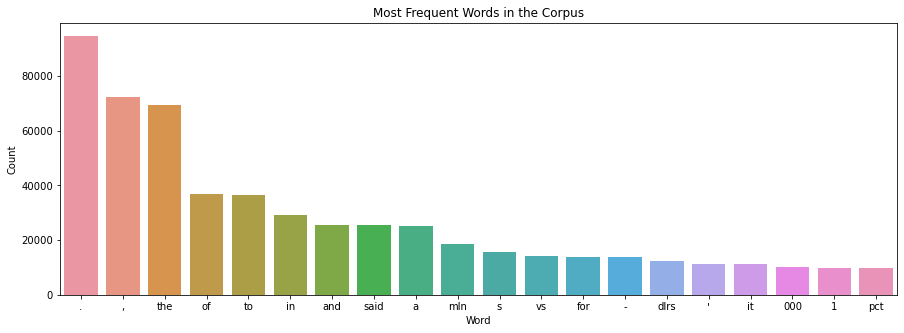

In [17]:
plot_word_frequency(reuters_words,20)

Lets tokenize the corpus and remove stopwords and special characters

In [20]:
import re

wpt = nltk.WordPunctTokenizer()
stop_words = nltk.corpus.stopwords.words('english')


def normalize_document(doc):
    # lowercase and remove special characters\whitespace
    doc = re.sub(r'[^a-zA-Z\s]', '', doc, re.I|re.A)
    doc = doc.lower()
    doc = doc.strip()
    # tokenize document
    tokens = wpt.tokenize(doc)
    # filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # re-create document from filtered tokens
    doc = ' '.join(filtered_tokens)
    return doc


normalize_corpus = np.vectorize(normalize_document)

In [21]:
norm_corpus = normalize_corpus(reuters_words)
norm_corpus

array(['asian', 'exporters', 'fear', ..., '', '', 'mln'], dtype='<U24')

In [22]:
print(len(norm_corpus))

1720901


C:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Most Frequent Words in the Corpus'}, xlabel='Word', ylabel='Count'>

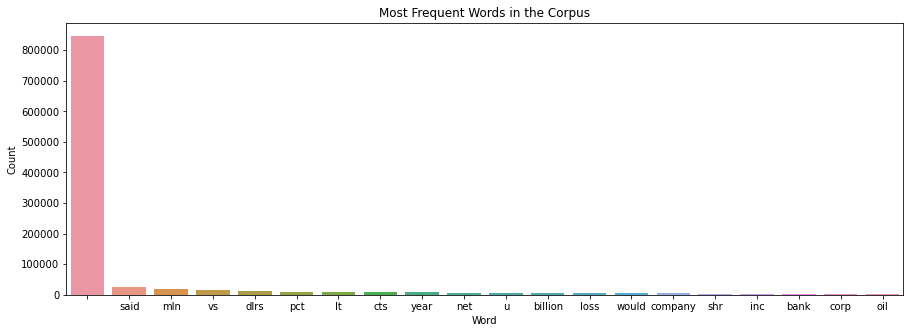

In [23]:
plot_word_frequency(norm_corpus,20)

We can now see the most frequent words of the corpus after removing stopwords.
Above are 20 most frequent words

In [24]:
#Creating a FreqDist object
fd=FreqDist()

In [25]:
#Creating ranks and frequencies
ranks = []
freqs = []
for i in norm_corpus:
    fd[i] +=1
for rank,word in enumerate(fd):
    ranks.append(rank+1)
    freqs.append(fd[word])

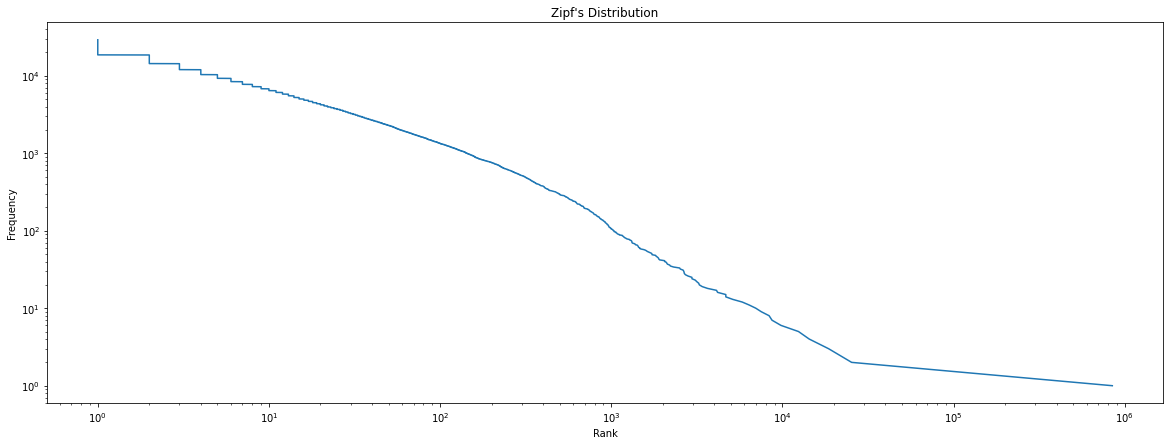

In [26]:
#Plotting the distribution
plt.figure(figsize=(20,7))
plt.loglog(freqs,ranks)
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.title("Zipf's Distribution")
plt.show()

Ref: https://dzone.com/articles/exploring-zipf%E2%80%99s-law-python